In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("whitegrid")
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load Titanic Dataset
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

FileNotFoundError: ignored

In [ ]:
#Get detailed information about datasets
train.info()
print('=' * 40)
test.info()

NameError: ignored

# Feature Engineering

In [ ]:
#Get a view of data
train.head(10)

NameError: ignored

In [ ]:
#Get other description
train.describe()

NameError: ignored

In [ ]:
#Remove unnecessary columns
train.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

NameError: ignored

Total Null Entries in training samples : 0
Total Null Entries in testing samples  : 0


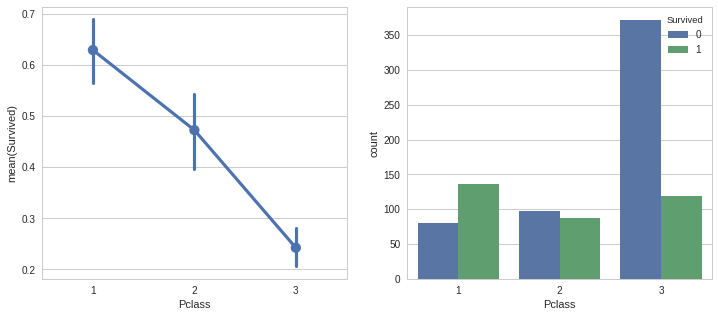

In [ ]:
#Feature - Pclass

#Number of null values
print("Total Null Entries in training samples :", train['Pclass'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Pclass'].isnull().sum())

#Data Visualization
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.pointplot(data=train, x="Pclass", y="Survived", ax=ax1)
sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax2)

Total Null Entries in training samples : 0
Total Null Entries in testing samples  : 0


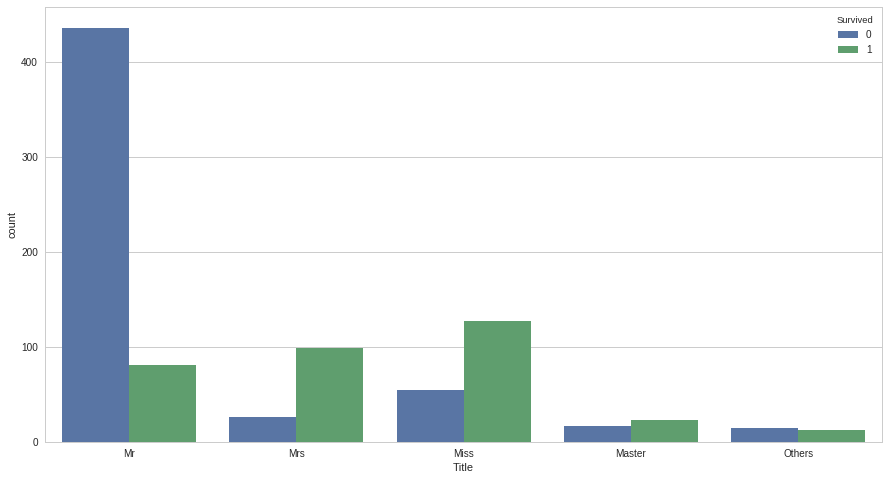

In [ ]:
#Feature - Name

#Number of null values
print("Total Null Entries in training samples :", train['Name'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Name'].isnull().sum())

#Names doesn't matter much, but the title associated with it may help.
#Extract titles from names
train['Title'] = train["Name"].map(lambda name : name.split(".")[0].split(" ")[-1])
test['Title'] = test["Name"].map(lambda name : name.split(".")[0].split(" ")[-1])
train["Title"] = train["Title"].map({"Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master"})
train["Title"].fillna("Others", inplace=True)
test["Title"] = test["Title"].map({"Mr" : "Mr", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master"})
test["Title"].fillna("Others", inplace=True)

#Data Visualization
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.countplot(data=train, x="Title", hue="Survived", ax=ax1)

#Map titles to nominal values
train["Title"] = train["Title"].map({"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Others" : 4})
test["Title"] = test["Title"].map({"Mr" : 0, "Mrs" : 1, "Miss" : 2, "Master" : 3, "Others" : 4})

#Drop names
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

Total Null Entries in training samples : 0
Total Null Entries in testing samples  : 0


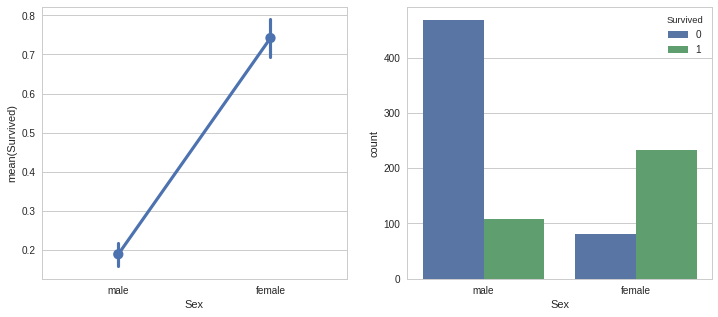

In [ ]:
#Feature - Sex

#Number of null values
print("Total Null Entries in training samples :", train['Sex'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Sex'].isnull().sum())

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=train, x="Sex", y="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)

#Map to integer data
train["Sex"] = train["Sex"].map({"male" : 0, "female" : 1})
test["Sex"] = test["Sex"].map({"male" : 0, "female" : 1})

Total Null Entries in training samples : 177
Total Null Entries in testing samples  : 86


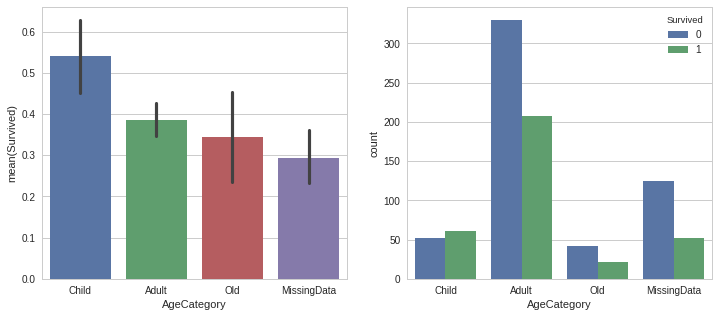

In [ ]:
#Feature - Age

#Number of null values
print("Total Null Entries in training samples :", train['Age'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Age'].isnull().sum())

#One of the way to deal with missing values is to replace them with mean of that feature values, 
#but since there are too many null entries, i will be categorizing these entries into 
#labels - [child, adult, old, missingdata]

train["AgeCategory"] = "Adult"
train["AgeCategory"].loc[train["Age"] < 18 ] = "Child"
train["AgeCategory"].loc[train["Age"] > 50 ] = "Old"
train["AgeCategory"].loc[train["Age"].isnull()] = "MissingData"

test["AgeCategory"] = "Adult"
test["AgeCategory"].loc[train["Age"] < 18 ] = "Child"
test["AgeCategory"].loc[train["Age"] > 50 ] = "Old"
test["AgeCategory"].loc[train["Age"].isnull()] = "MissingData"

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train, x="AgeCategory", y="Survived", ax=ax1, order=["Child", "Adult", "Old", "MissingData"])
sns.countplot(data=train, x="AgeCategory", hue="Survived", ax=ax2, order=["Child", "Adult", "Old", "MissingData"])

#Map to integer data
train["AgeCategory"] = train["AgeCategory"].map({"Child" : 0, "Adult" : 1, "Old" : 2, "MissingData" : 3})
test["AgeCategory"] = test["AgeCategory"].map({"Child" : 0, "Adult" : 1, "Old" : 2, "MissingData" : 3})

#Drop Age
train.drop("Age", axis=1, inplace=True)
test.drop("Age", axis=1, inplace=True)

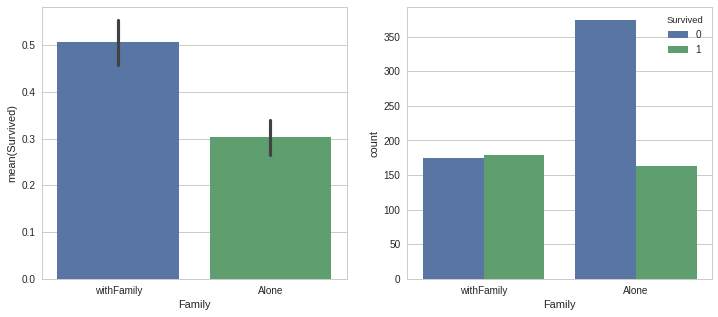

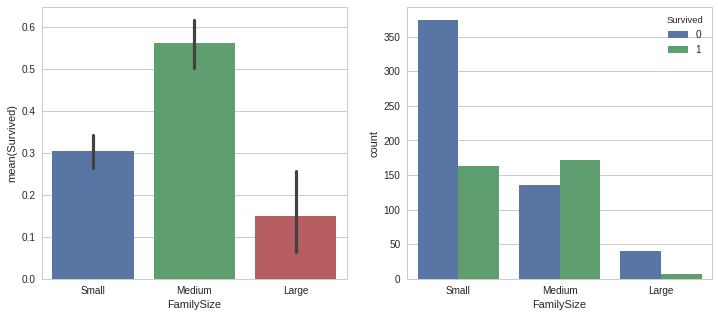

In [ ]:
#Feature - Family

#From sibSp and Parch, we can add whether a person has a family or not.
#Also we will create another feature determining number of family members onboard.

train['Family'] = train['SibSp'] + train['Parch'] + 1
train['FamilySize'] = train['Family']
train['FamilySize'].loc[train['Family'] == 1] = "Small"
train['FamilySize'].loc[train['Family'] > 1] = "Medium"
train['FamilySize'].loc[train['Family'] > 5] = "Large"
train['Family'].loc[train['Family'] > 1] = 'withFamily'
train['Family'].loc[train['Family'] == 1] = 'Alone'

test['Family'] = test['SibSp'] + test['Parch'] + 1
test['FamilySize'] = test['Family']
test['FamilySize'].loc[test['Family'] == 1] = "Small"
test['FamilySize'].loc[test['Family'] > 1] = "Medium"
test['FamilySize'].loc[test['Family'] > 5] = "Large"
test['Family'].loc[test['Family'] > 1] = 'withFamily'
test['Family'].loc[test['Family'] == 1] = 'Alone'

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train, x="Family", y="Survived", ax=ax1)
sns.countplot(data=train, x="Family", hue="Survived", ax=ax2)
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train, x="FamilySize", y="Survived", ax=ax3, order=["Small", "Medium", "Large"])
sns.countplot(data=train, x="FamilySize", hue="Survived", ax=ax4, order=["Small", "Medium", "Large"])

#Map to integral values
train["Family"] = train["Family"].map({"Alone" : 0, "withFamily" : 1})
train["FamilySize"] = train["FamilySize"].map({"Small" : 0, "Medium" : 1, "Large" : 2})
test["Family"] = test["Family"].map({"Alone" : 0, "withFamily" : 1})
test["FamilySize"] = test["FamilySize"].map({"Small" : 0, "Medium" : 1, "Large" : 2})

#Drop SibSp and Parch Columns
train.drop(["Parch", "SibSp"], axis=1, inplace=True)
test.drop(["Parch", "SibSp"], axis=1, inplace=True)

Total Null Entries in training samples : 0
Total Null Entries in testing samples  : 1


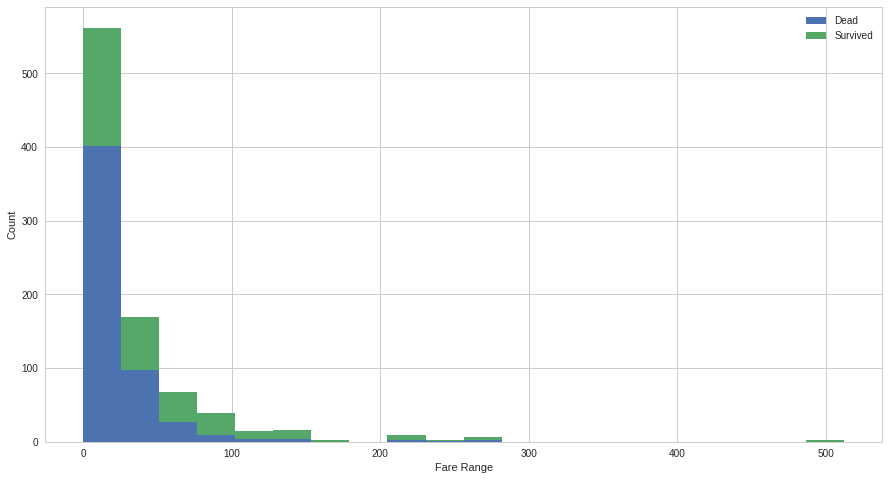

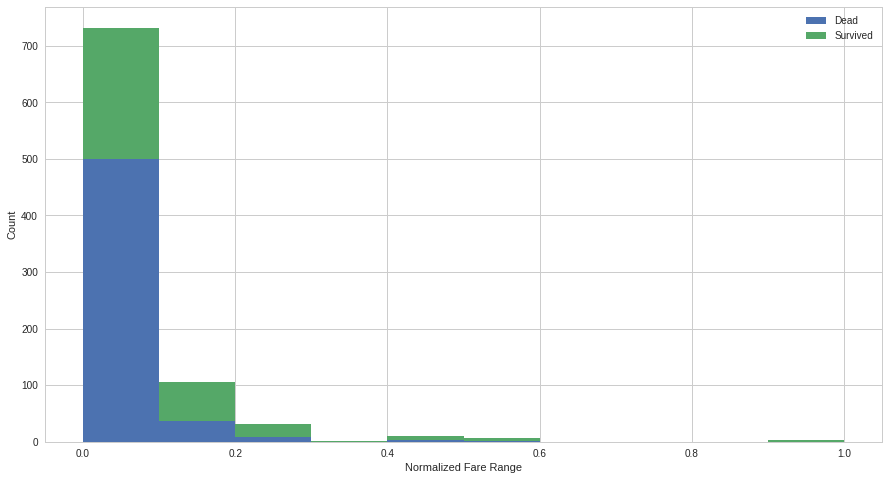

In [ ]:
#Feature - Fare

#Number of null values
print("Total Null Entries in training samples :", train['Fare'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Fare'].isnull().sum())

#Fill null values with mean fare
test['Fare'].fillna(train['Fare'].mean(), inplace=True)

#Data Visualization
fig = plt.figure(figsize=(15,8))
plt.hist([train[train["Survived"]==0]["Fare"], train[train["Survived"]==1]["Fare"]], stacked=True, bins=20, label=['Dead', 'Survived'])
plt.xlabel("Fare Range")
plt.ylabel("Count")
plt.legend()

#Fare data contains some extreme values which can be normalized
scale = preprocessing.MinMaxScaler()
train['normalizedFare'] = scale.fit_transform(train['Fare'].reshape(-1,1))

#Data Visualization
fig = plt.figure(figsize=(15,8))
plt.hist([train[train["Survived"]==0]["normalizedFare"], train[train["Survived"]==1]["normalizedFare"]], stacked=True, bins=10, label=['Dead', 'Survived'])
plt.xlabel("Normalized Fare Range")
plt.ylabel("Count")
plt.legend()

test["normalizedFare"] = scale.transform(test['Fare'].reshape(-1,1))
train.drop("Fare", axis=1, inplace=True)
test.drop("Fare", axis=1, inplace=True)

Total Null Entries in training samples : 2
Total Null Entries in testing samples  : 0
Maximum Occurrence : S


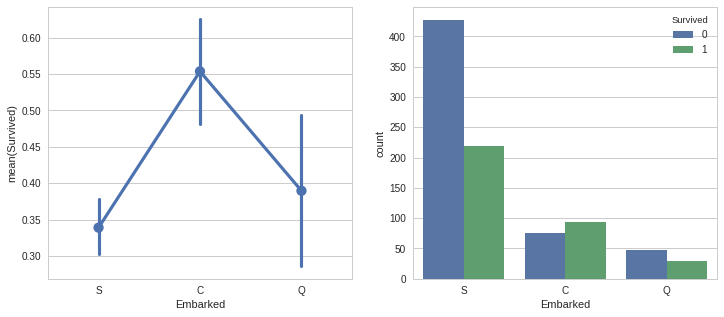

In [ ]:
#Feature - Embarked

#Number of null values
print("Total Null Entries in training samples :", train['Embarked'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Embarked'].isnull().sum())

#Fill missing values with maximum occurence of embarked category
print("Maximum Occurrence :", train['Embarked'].describe()['top'])
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

#Data Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.pointplot(data=train, x="Embarked", y="Survived", ax=ax1)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax2)

#Map Ports to integral values
train["Embarked"] = train["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})
test["Embarked"] = test["Embarked"].map({"S" : 0, "C" : 1, "Q" : 2})

In [ ]:
#Feature - Cabin

#Number of null values
print("Total Null Entries in training samples :", train['Cabin'].isnull().sum())
print("Total Null Entries in testing samples  :", test['Cabin'].isnull().sum())

#We are also dropping Cabin feature, since it contains a lot of missing values and cannot be used as such.
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

Total Null Entries in training samples : 687
Total Null Entries in testing samples  : 327


# Machine Learning Algorithm Analysis

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [ ]:
#Divide data into input and target values
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

#create dictionary to keep track of accuracies
Accuracy = {}

In [ ]:
X_train.head(10)

,Pclass,Sex,Embarked,Title,AgeCategory,Family,FamilySize,normalizedFare
0,3,0,0,0,1,1,1,0.014151
1,1,1,1,1,1,1,1,0.139136
2,3,1,0,2,1,0,0,0.015469
3,1,1,0,1,1,1,1,0.103644
4,3,0,0,0,1,0,0,0.015713
5,3,0,2,0,3,0,0,0.016510
6,1,0,0,0,2,0,0,0.101229
7,3,0,0,3,0,1,1,0.041136
8,3,1,0,1,1,1,1,0.021731
9,2,1,1,1,0,1,1,0.058694


In [ ]:
X_train.describe()

,Pclass,Sex,Embarked,Title,AgeCategory,Family,FamilySize,normalizedFare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,0.361392,0.804714,1.342312,0.397306,0.450056,0.062858
std,0.836071,0.477990,0.635673,1.095455,0.936522,0.489615,0.594476,0.096995
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.015440
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.028213
75%,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.060508
max,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,2.000000,1.000000


Gaussian Naive Bayes Accuracy : 0.771097746035
Multinomial Naive Bayes Accuracy : 0.778900072949
Bernoulli Naive Bayes Accuracy : 0.791247282153


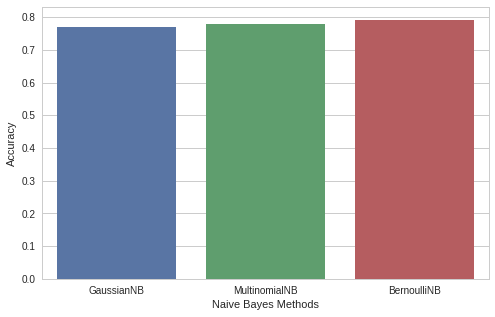

In [ ]:
#Method - Naive Bayes 

#Titanic Dataset is evaluated against all methods in Naive Bayes to decide on best approach.

#Gaussian
GNB = GaussianNB()
scores = cross_val_score(GNB, X_train, y_train, cv=5)
accuracyGNB = scores.mean()
print("Gaussian Naive Bayes Accuracy :", accuracyGNB)

#Multinomial
MNB = MultinomialNB()
scores = cross_val_score(MNB, X_train, y_train, cv=5)
accuracyMNB = scores.mean()
print("Multinomial Naive Bayes Accuracy :", accuracyMNB)

#Bernoulli
BNB = BernoulliNB()
scores = cross_val_score(BNB, X_train, y_train, cv=5)
accuracyBNB = scores.mean()
print("Bernoulli Naive Bayes Accuracy :", accuracyBNB)

#Plot accuracies corresponding to various naive bayes methods
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
fig = sns.barplot(y=[accuracyGNB, accuracyMNB, accuracyBNB], x=["GaussianNB", "MultinomialNB", "BernoulliNB"], ax=ax1)
fig.set(xlabel="Naive Bayes Methods", ylabel="Accuracy")

#Finally we decide to use Bernoulli Naive Bayes
Accuracy["naiveBayes"] = accuracyBNB

Maximum Accuracy : 0.820461119936
Value of K corresponding to maximum accuracy : 10
K Nearest Neighbor Accuracy : 0.820461119936


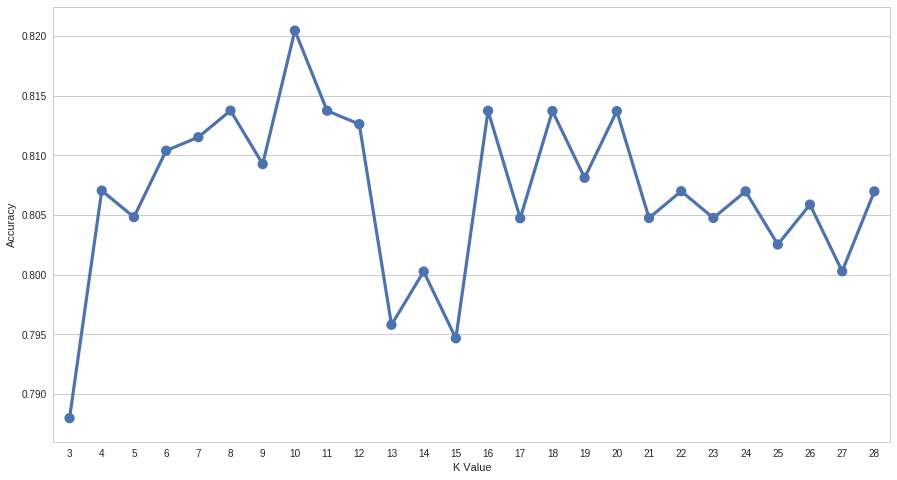

In [ ]:
#Method - K Nearest Neighbors

#Deciding K is very important factor for KNN.
#Since target values are either 0 or 1. We have to set K value at least (possible outcomes + 1)3 
#and maximum square root of number of training samples. We will use cross-validation technique to find optimal value of K.

#Cross-Validation
accuracy = []
k_value = []
for k in range(3,int(np.sqrt(len(train)))):
    kNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(kNN, X_train, y_train, cv=5)
    accuracy.append(scores.mean())
    k_value.append(k)

#Plot accuracies corresponding to value of K
fig, ax1 = plt.subplots(1, 1, figsize=(15,8))
fig = sns.pointplot(y=accuracy, x=k_value, ax=ax1)
fig.set(xlabel="K Value", ylabel="Accuracy")

print("Maximum Accuracy :", max(accuracy))
print("Value of K corresponding to maximum accuracy :", k_value[accuracy.index(max(accuracy))])

#Final value of K must correspond to maximum accuracy.
kNN = KNeighborsClassifier(n_neighbors=k_value[accuracy.index(max(accuracy))])
scores = cross_val_score(kNN, X_train, y_train, cv=5)
accuracy = scores.mean()
print("K Nearest Neighbor Accuracy :", accuracy)
Accuracy["kNN"] = accuracy

In [ ]:
#Method - Logistic Regreesion

logisticRegression = LogisticRegression()
scores = cross_val_score(logisticRegression, X_train, y_train, cv=5)
accuracy = scores.mean()
print("Logistic Regreesion Accuracy :", accuracy)
Accuracy["logisticRegression"] = accuracy

Logistic Regreesion Accuracy : 0.802464476927


Support Vector Machine Accuracy (Linear Kernel) : 0.788993884999
Support Vector Machine Accuracy (RBF Kernel) : 0.81484335519
Support Vector Machine Accuracy (Poly Kernel) : 0.818195168642


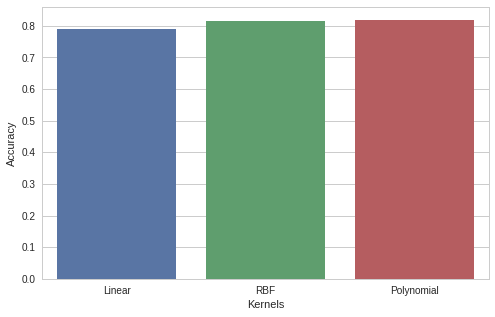

In [ ]:
#Method - Support Vector Machine

#We will be evaluating SVM with respect to linear kernel, RBF kernel and Polynomial kernel.

#Linear Kernel
SVML = svm.SVC(kernel="linear")
scores = cross_val_score(SVML, X_train, y_train, cv=5)
accuracySVML = scores.mean()
print("Support Vector Machine Accuracy (Linear Kernel) :", accuracySVML)

#RBF Kernel
SVMR = svm.SVC(kernel="rbf")
scores = cross_val_score(SVMR, X_train, y_train, cv=5)
accuracySVMR = scores.mean()
print("Support Vector Machine Accuracy (RBF Kernel) :", accuracySVMR)

#Polynomial Kernel
SVMP = svm.SVC(kernel="poly")
scores = cross_val_score(SVMP, X_train, y_train, cv=5)
accuracySVMP = scores.mean()
print("Support Vector Machine Accuracy (Poly Kernel) :", accuracySVMP)

#Plot accuracies corresponding to various naive bayes methods
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
fig = sns.barplot(y=[accuracySVML, accuracySVMR, accuracySVMP], x=["Linear", "RBF", "Polynomial"], ax=ax1)
fig.set(xlabel="Kernels", ylabel="Accuracy")

#Finally we decide to use Polynomial Kernel
Accuracy["supportVectorMachine"] = accuracySVMP

Decision Tree Classifier Accuracy : 0.819400436983


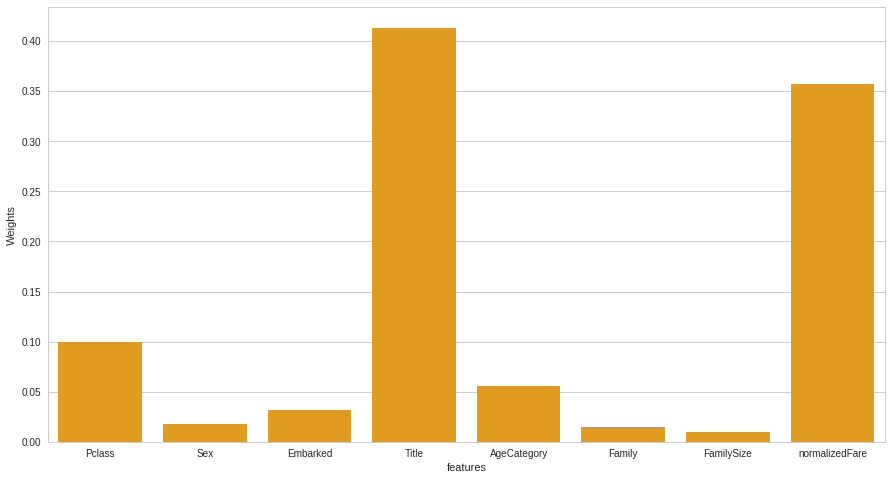

In [ ]:
#Method - Decision Tree Classifier

decisionTree = DecisionTreeClassifier()
scores = cross_val_score(decisionTree, X_train, y_train, cv=5)
accuracy = scores.mean()
print("Decision Tree Classifier Accuracy :", accuracy)
Accuracy["decisionTree"] = accuracy

#Feature Weightage
decisionTree.fit(X_train, y_train)
fig = plt.figure(figsize=(15,8))
fig = sns.barplot(y=list(decisionTree.feature_importances_), x=list(X_train.columns), color="orange")
fig.set(xlabel="features", ylabel="Weights")

Random Forest Classifier Accuracy : 0.805917290916


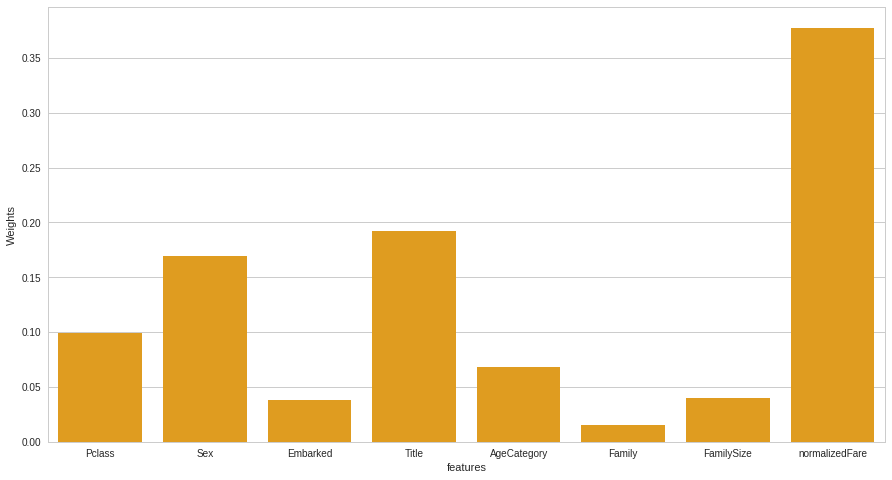

In [ ]:
#Method - Random Forest Classifier

randomForest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(randomForest, X_train, y_train, cv=5)
RFaccuracy = scores.mean()
print("Random Forest Classifier Accuracy :", RFaccuracy)
Accuracy["randomForest"] = RFaccuracy

#Feature Weightage
randomForest.fit(X_train, y_train)
fig = plt.figure(figsize=(15,8))
fig = sns.barplot(y=list(randomForest.feature_importances_), x=list(X_train.columns), color="orange")
fig.set(xlabel="features", ylabel="Weights")

AdaBoost Classifier Accuracy : 0.817140904614


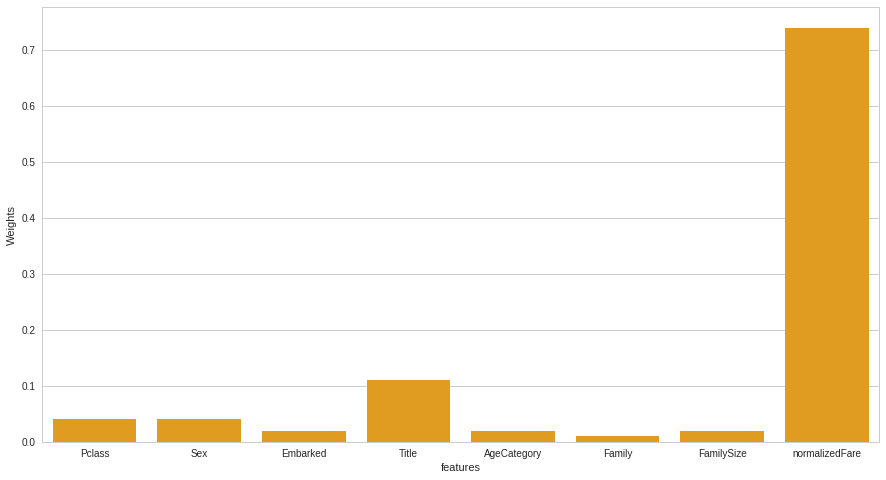

In [ ]:
#Method - AdaBoost Classifier

adaBoost = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(adaBoost, X_train, y_train, cv=5)
accuracy = scores.mean()
print("AdaBoost Classifier Accuracy :", accuracy)
Accuracy["adaBoost"] = accuracy

#Feature Weightage
adaBoost.fit(X_train, y_train)
fig = plt.figure(figsize=(15,8))
fig = sns.barplot(y=list(adaBoost.feature_importances_), x=list(X_train.columns), color="orange")
fig.set(xlabel="features", ylabel="Weights")

Gradient Boosting Classifier Accuracy : 0.828351680464


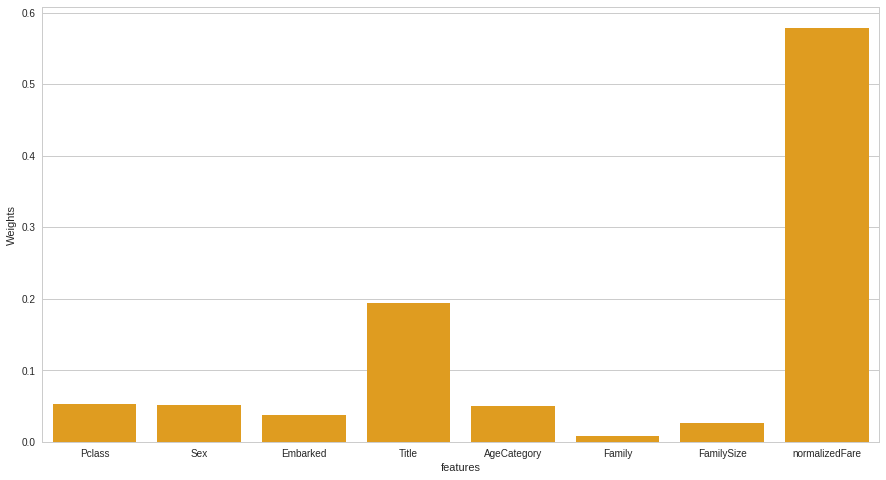

In [ ]:
#Method - Gradient Boosting Classifier

gradientBoosting = GradientBoostingClassifier(n_estimators=100)
scores = cross_val_score(gradientBoosting, X_train, y_train, cv=5)
accuracy = scores.mean()
print("Gradient Boosting Classifier Accuracy :", accuracy)
Accuracy["gradientBoosting"] = accuracy

#Feature Weightage
gradientBoosting.fit(X_train, y_train)
fig = plt.figure(figsize=(15,8))
fig = sns.barplot(y=list(gradientBoosting.feature_importances_), x=list(X_train.columns), color="orange")
fig.set(xlabel="features", ylabel="Weights")

In [ ]:
#Method - Voting Classifier

#I have tried many combinations for voting classifiers, here is what i observed-
# 1) Both gradient boosting and adaboost has similar weightage for features. Hence, I think adding
#    Only one classifier is fine.
# 2) Naive Baeyes has least accuracy and is not much effective.
# 3) Adding SVM somehow leads to decrease in accuracy(Maybe due to overfitting). Hence, removed.
# 4) Even though decision tree and random forest uses same tree based algorithms, feature weightage is
#    totally different and hence effective.

votingClasssifier = VotingClassifier(estimators=[('KNN', kNN), ('LR', logisticRegression), ("DT", decisionTree), ('RF', randomForest), ('GB', gradientBoosting)], voting="hard")
scores = cross_val_score(votingClasssifier, X_train, y_train, cv=5)
accuracy = scores.mean()
print("Voting Classifier Accuracy :", accuracy)
Accuracy["votingClasssifier"] = accuracy

Voting Classifier Accuracy : 0.833957032925


In [ ]:
print(Accuracy)

{'naiveBayes': 0.79124728215287177, 'kNN': 0.82046111993565451, 'logisticRegression': 0.80246447692680323, 'supportVectorMachine': 0.81819516864217046, 'decisionTree': 0.81940043698336085, 'randomForest': 0.80591729091594499, 'adaBoost': 0.81714090461442657, 'gradientBoosting': 0.82835168046380814, 'votingClasssifier': 0.83395703292482737}


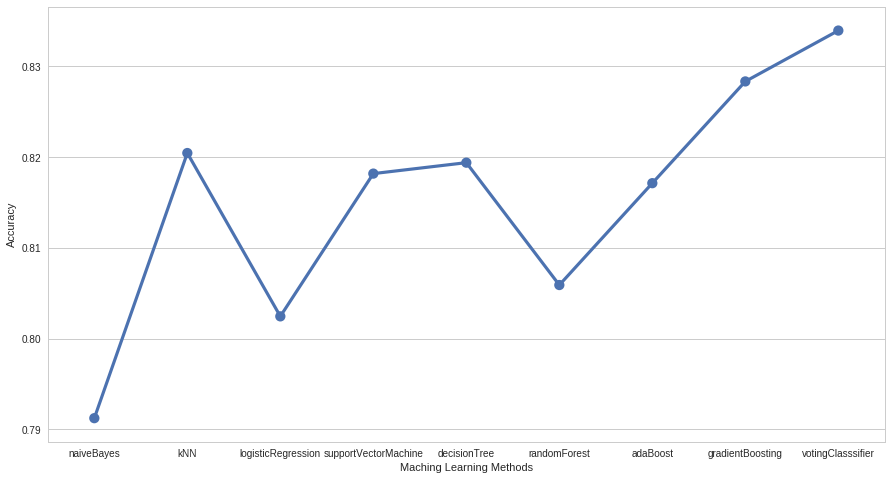

In [ ]:
#Plot accuracies with repect to multiple methods
fig = plt.figure(figsize=(15,8))
fig = sns.pointplot(y=list(Accuracy.values()), x=list(Accuracy.keys()))
fig.set(ylabel="Accuracy", xlabel="Maching Learning Methods")

In [ ]:
#Create test data
X_test = test.drop("PassengerId", axis=1)

#Run Voting Classifier for better results
votingClasssifier.fit(X_train, y_train)
y_test = votingClasssifier.predict(X_test)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('submission.csv', index=False)

***Final Result against test set - 0.8134* 